In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import shutil
import matplotlib.dates as mdates
import time
from tqdm import tqdm_notebook as tqdm
import warnings
import matplotlib.pyplot as plt
import ROOT
from array import array
from wand.image import Image as WImage

Welcome to JupyROOT 6.24/02


In [ ]:
def deflectionVsD():
ROOT.gStyle.SetLabelFont(132,"xyz")
ROOT.gStyle.SetLabelSize(0.06,"xyz")
ROOT.gStyle.SetTitleFont(132,"xyz")
ROOT.gStyle.SetTitleSize(0.07,"xyz")
ROOT.gStyle.SetPadLeftMargin(0.13)
ROOT.gStyle.SetPadBottomMargin(0.14)
ROOT.gStyle.SetTitleOffset(0.90,"x")
ROOT.gStyle.SetTitleOffset(0.70,"y")
ROOT.gStyle.SetTitleOffset(0.70,"z")
ROOT.gStyle.SetTextFont(120)
ROOT.gStyle.SetLineWidth(2)
ROOT.gStyle.SetHistLineWidth(3)
ROOT.gStyle.SetFrameLineWidth(2)
ROOT.gStyle.SetMarkerStyle(7)
h=ROOT.TH2F("","",40,17,21,90,-4,5)

NRGBs=5
NCont=510
stop=[0.00,0.34, 0.61,0.84,1.00]
red=[0.215861, 0.826185, 0.841820, 0.905216, 0.587045 ]
green=[ 0.551260, 0.891598, 0.833696, 0.486757, 0.291068 ]
blue=[0.504513, 0.575184, 0.325583, 0.144282, 0.137044 ]

stopArray=array('d',stop)
redArray=array('d',red)
greenArray=array('d',green)
blueArray=array('d',blue)

ROOT.TColor.CreateGradientColorTable(int(NRGBs),stopArray,redArray,greenArray,blueArray,int(NCont))
df_elongation=pd.read_csv(r"../../src/results/one_sphere/ang_20/cone_angle"\
    +str(40)+"/proton/L_B_1.0Mpc/B_0.001nG/elongation_"+str(100)+"Mpc.txt",sep="\s+",header=None).to_numpy()
df_energy=pd.read_csv(r"../../src/results/one_sphere/ang_20/cone_angle"+str(40)\
    +"/proton/L_B_1.0Mpc/B_0.001nG/energy_"+str(100)+"Mpc.txt",sep="\s+",header=None).to_numpy()    
    

In [8]:
def percVSdeflection(R,B,LB,phi,tick):
    perc=[]
    defle=[]
    elo=[]
    for i in range(phi,2*phi,tick):
        df=pd.read_csv(r"../../src/results/one_sphere/ang_20/cone_angle"+str(i)+"/proton/L_B_"+str(LB)+"Mpc/B_"+str(B)+"nG/results_R"+str(R)+".txt",sep="\s+", header=0)
        perc.append((len(df)/1e5))
        defle.append(phi-i/2)
        elo.append(df["D"]-R)

    return perc, defle, elo

In [21]:
perc100, defle100, elo100 = percVSdeflection(100,0.001,1.0,20)
perc120, defle120, elo120 = percVSdeflection(120,0.001,1.0,20)
perc160, defle160, elo160 = percVSdeflection(160,0.001,1.0,20)
perc200, defle200, elo200 = percVSdeflection(200,0.001,1.0,20)
perc240, defle240, elo240 = percVSdeflection(240,0.001,1.0,20)

perc1, defle1, elo1 = percVSdeflection(1,1.0,1.0,20)
perc5, defle5, elo5 = percVSdeflection(5,1.0,1.0,20)
perc10, defle10, elo10 = percVSdeflection(10,1.0,1.0,20)
perc15, defle15, elo15 = percVSdeflection(15,1.0,1.0,20)
perc20, defle20, elo20 = percVSdeflection(20,1.0,1.0,20)
perc40, defle40, elo40 = percVSdeflection(40,1.0,1.0,20)
perc60, defle60, elo60 = percVSdeflection(60,1.0,1.0,20)
perc80, defle80, elo80 = percVSdeflection(80,1.0,1.0,20)

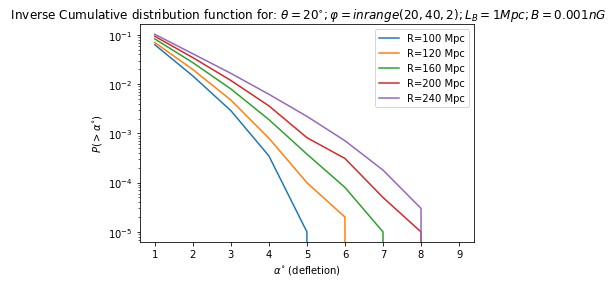

In [15]:
plt.plot(defle100,perc100,label="R=100 Mpc")
plt.plot(defle120,perc120,label="R=120 Mpc")
plt.plot(defle160,perc160,label="R=160 Mpc")
plt.plot(defle200,perc200,label="R=200 Mpc")
plt.plot(defle240,perc240,label="R=240 Mpc")
# plt.ylim(1e-9,1e0)
plt.yscale("log")
plt.xlabel(r'$\alpha^{\circ}$ (defletion)')
plt.ylabel(r'$P(>\alpha^{\circ})$')
plt.title(r" Inverse Cumulative distribution function for: $\theta=20^{\circ}; \varphi=in range(20,40,2); L_{B}=1Mpc; B=0.001nG$")
plt.legend(loc="best")
plt.show()


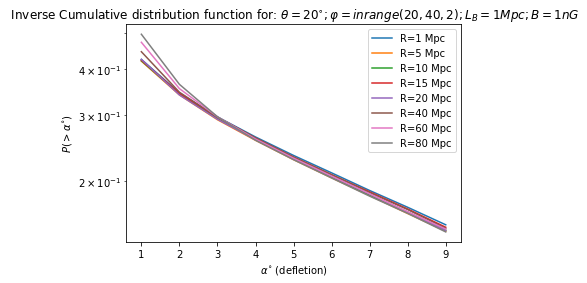

In [22]:
plt.plot(defle1,perc1,label="R=1 Mpc")
plt.plot(defle5,perc5,label="R=5 Mpc")
plt.plot(defle10,perc10,label="R=10 Mpc")
plt.plot(defle15,perc15,label="R=15 Mpc")
plt.plot(defle20,perc20,label="R=20 Mpc")
plt.plot(defle40,perc40,label="R=40 Mpc")
plt.plot(defle60,perc60,label="R=60 Mpc")
plt.plot(defle80,perc80,label="R=80 Mpc")
# plt.ylim(1e-9,1e0)
plt.yscale("log")
plt.xlabel(r'$\alpha^{\circ}$ (defletion)')
plt.ylabel(r'$P(>\alpha^{\circ})$')
plt.title(r" Inverse Cumulative distribution function for: $\theta=20^{\circ}; \varphi=in range(20,40,2); L_{B}=1Mpc; B=1nG$")
plt.legend(loc="best")
plt.show()

In [9]:
perc1_ang80, defle1_80, elo1_ang80 = percVSdeflection(1,1.0,1.0,80,20)
perc5_ang80, defle5_ang80, elo5_ang80 = percVSdeflection(5,1.0,1.0,80,20)
perc10_ang80, defle10_ang80, elo10_ang80 = percVSdeflection(10,1.0,1.0,80,20)
perc15_ang80, defle15_ang80, elo15_ang80 = percVSdeflection(15,1.0,1.0,80,20)
perc20_ang80, defle20_ang80, elo20_ang80 = percVSdeflection(20,1.0,1.0,80,20)
perc40_ang80, defle40_ang80, elo40_ang80 = percVSdeflection(40,1.0,1.0,80,20)
perc60_ang80, defle60_ang80, elo60_ang80 = percVSdeflection(60,1.0,1.0,80,20)
perc80_ang80, defle80_ang80, elo80_ang80 = percVSdeflection(80,1.0,1.0,80,20)

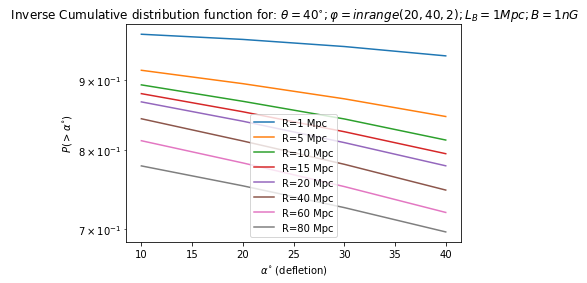

In [11]:
plt.plot(defle1_80,perc1_ang80,label="R=1 Mpc")
plt.plot(defle5_ang80,perc5_ang80,label="R=5 Mpc")
plt.plot(defle10_ang80,perc10_ang80,label="R=10 Mpc")
plt.plot(defle15_ang80,perc15_ang80,label="R=15 Mpc")
plt.plot(defle20_ang80,perc20_ang80,label="R=20 Mpc")
plt.plot(defle40_ang80,perc40_ang80,label="R=40 Mpc")
plt.plot(defle60_ang80,perc60_ang80,label="R=60 Mpc")
plt.plot(defle80_ang80,perc80_ang80,label="R=80 Mpc")
# plt.ylim(1e-9,1e0)
plt.yscale("log")
plt.xlabel(r'$\alpha^{\circ}$ (defletion)')
plt.ylabel(r'$P(>\alpha^{\circ})$')
plt.title(r" Inverse Cumulative distribution function for: $\theta=40^{\circ}; \varphi=in range(20,40,2); L_{B}=1Mpc; B=1nG$")
plt.legend(loc="best")
plt.show()


In [164]:
ROOT.gStyle.SetLabelFont(132,"xyz")
ROOT.gStyle.SetLabelSize(0.06,"xyz")
ROOT.gStyle.SetTitleFont(132,"xyz")
ROOT.gStyle.SetTitleSize(0.07,"xyz")
ROOT.gStyle.SetPadLeftMargin(0.13)
ROOT.gStyle.SetPadBottomMargin(0.14)
ROOT.gStyle.SetTitleOffset(0.90,"x")
ROOT.gStyle.SetTitleOffset(0.70,"y")
ROOT.gStyle.SetTitleOffset(0.70,"z")
ROOT.gStyle.SetTextFont(120)
ROOT.gStyle.SetLineWidth(2)
ROOT.gStyle.SetHistLineWidth(3)
ROOT.gStyle.SetFrameLineWidth(2)
ROOT.gStyle.SetMarkerStyle(7)
h=ROOT.TH2F("","",40,17,21,90,-4,5)

NRGBs=5
NCont=510
stop=[0.00,0.34, 0.61,0.84,1.00]
red=[0.215861, 0.826185, 0.841820, 0.905216, 0.587045 ]
green=[ 0.551260, 0.891598, 0.833696, 0.486757, 0.291068 ]
blue=[0.504513, 0.575184, 0.325583, 0.144282, 0.137044 ]

stopArray=array('d',stop)
redArray=array('d',red)
greenArray=array('d',green)
blueArray=array('d',blue)


for i in range(0,len(df_elongation)):
    h.Fill(np.log10(df_energy[i,0]*np.power(10,18)),np.log10(df_elongation[i,0]))


<ipython-input-164-d34dbc5c5726>:31: RuntimeWarning: divide by zero encountered in log10
  h.Fill(np.log10(df_energy[i,0]*np.power(10,18)),np.log10(df_elongation[i,0]))


AttributeError: 'TH2F' object has no attribute 'Getaxis'

In [97]:
for i in range(0,len(df_elongation)):
    h.Fill(np.log10(df_energy[i,0]*np.power(10,18)),np.log10(df_elongation[i,0]))

<ipython-input-97-d1ed1629e543>:2: RuntimeWarning: divide by zero encountered in log10
  h.Fill(np.log10(df_energy[i,0]*np.power(10,18)),np.log10(df_elongation[i,0]))


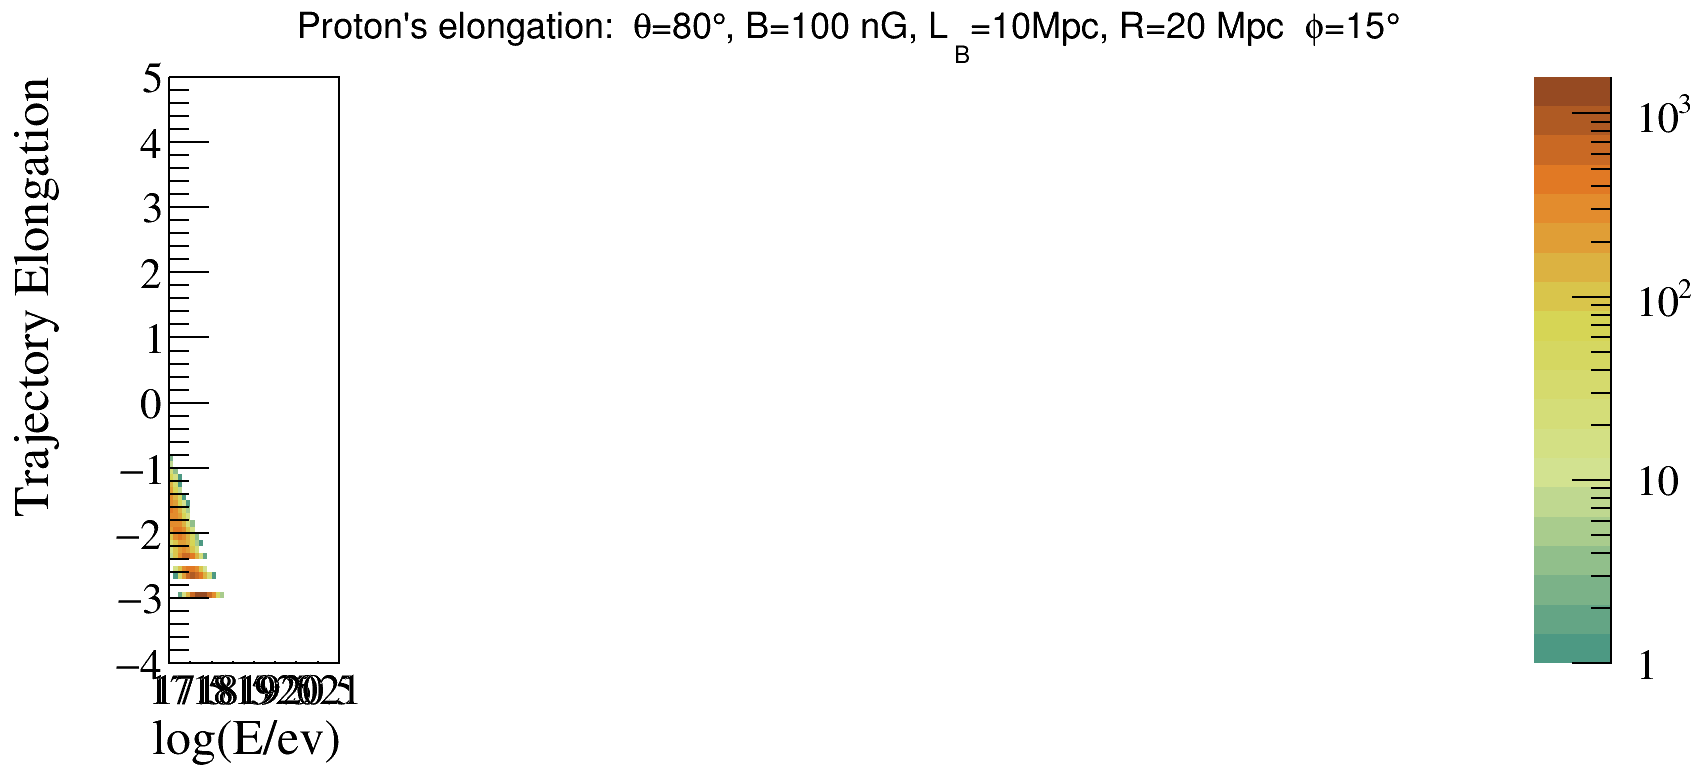

TypeError: 'cppyy.CPPOverload' object is not subscriptable